In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import tensorflow as tf


img_height = 64
img_width = 64
batch_size = 32


train_dir = '/content/drive/MyDrive/Data_SET_AI - Edit - Copy/Train2'
test_dir = '/content/drive/MyDrive/Data_SET_AI - Edit - Copy/test 2'

print("Loading and splitting Training Data...")

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print("\nLoading Test Data...")

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)


normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

print("\n✅ Preprocessing Complete! Images are resized, converted to tensors, and normalized.")

Loading and splitting Training Data...
Found 3810 files belonging to 10 classes.
Using 3048 files for training.
Found 3810 files belonging to 10 classes.
Using 762 files for validation.

Loading Test Data...
Found 886 files belonging to 10 classes.

✅ Preprocessing Complete! Images are resized, converted to tensors, and normalized.


In [4]:
from tensorflow.keras import layers, models


model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,858 (2.47 MB)

 Trainable params: 646,858 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model successfully compiled and ready to learn!")

Model successfully compiled and ready to learn!


In [6]:

epochs = 10

print("Starting training...")
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
print("Training complete!")

Starting training...
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 464s 5s/step - accuracy: 0.5149 - loss: 1.3409 - val_accuracy: 0.9344 - val_loss: 0.2321
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9610 - loss: 0.1583 - val_accuracy: 0.9869 - val_loss: 0.0682
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.9876 - loss: 0.0551 - val_accuracy: 0.9895 - val_loss: 0.0562
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 328ms/step - accuracy: 0.9938 - loss: 0.0230 - val_accuracy: 0.9711 - val_loss: 0.1015
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - accuracy: 0.9873 - loss: 0.0398 - val_accuracy: 0.9803 - val_loss: 0.0649
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 333ms/step - accuracy: 0.9903 - loss: 0.0362 - val_accuracy: 0.9934 - val_loss: 0.0222
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9948 - val_loss: 0.0166
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 328ms/step - accuracy: 0.9999 - loss

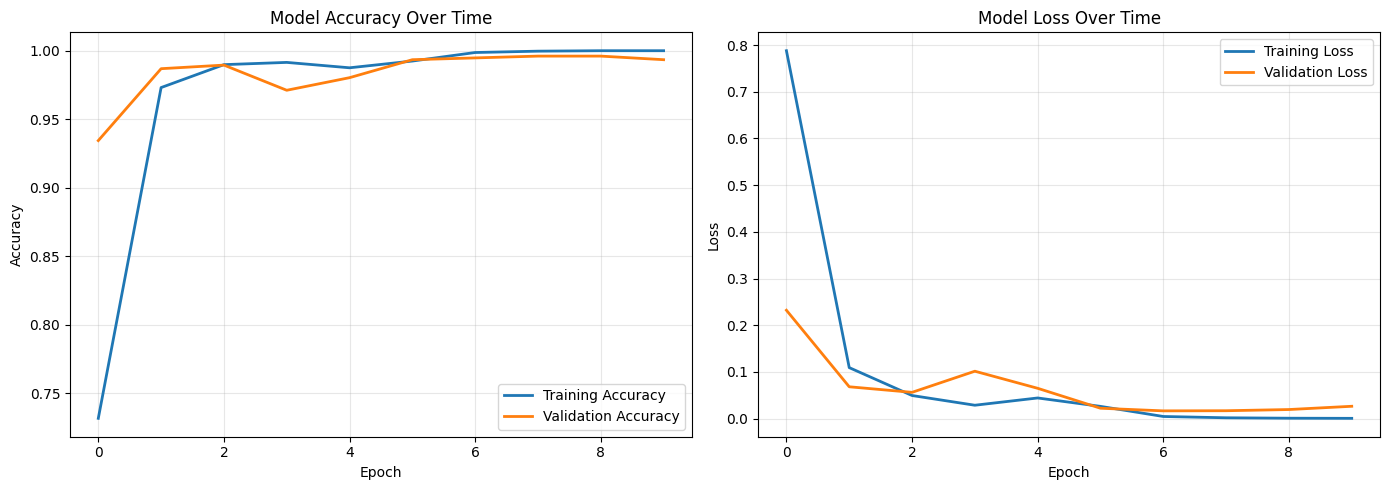

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 5))

# 1. Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Plot Loss (Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:

print("\nEvaluating model on Test Data...")
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")


Evaluating model on Test Data...
28/28 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9273 - loss: 0.3641

Final Test Accuracy: 92.89%
Final Test Loss: 0.3191


1. Generating Confusion Matrix...
Found 886 files belonging to 10 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step


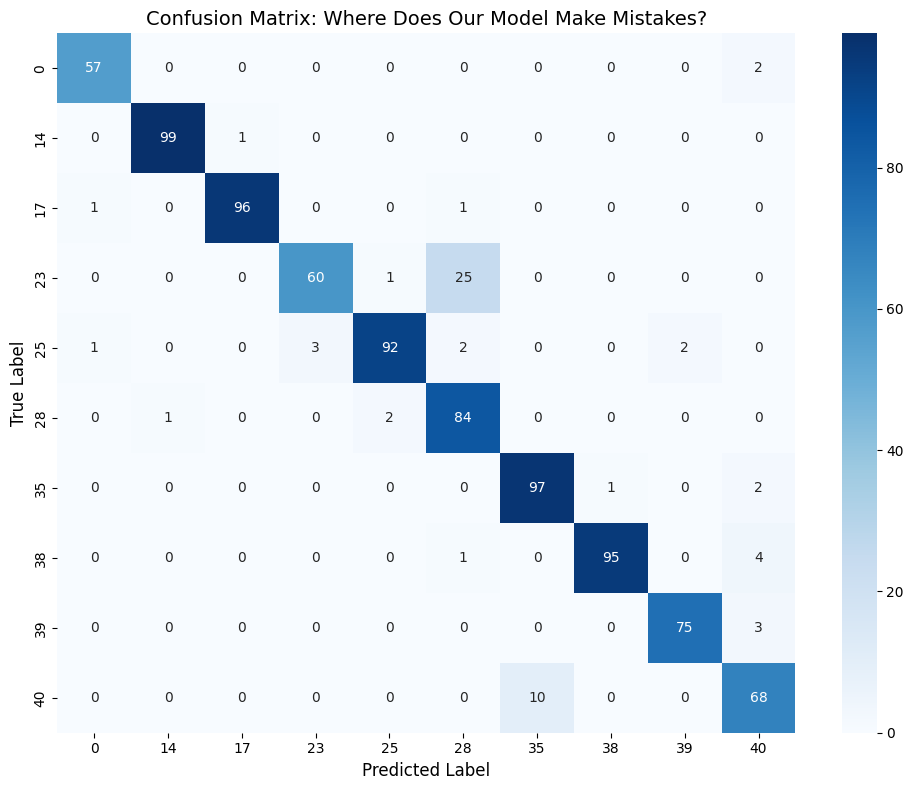


2. Generating Sample Predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


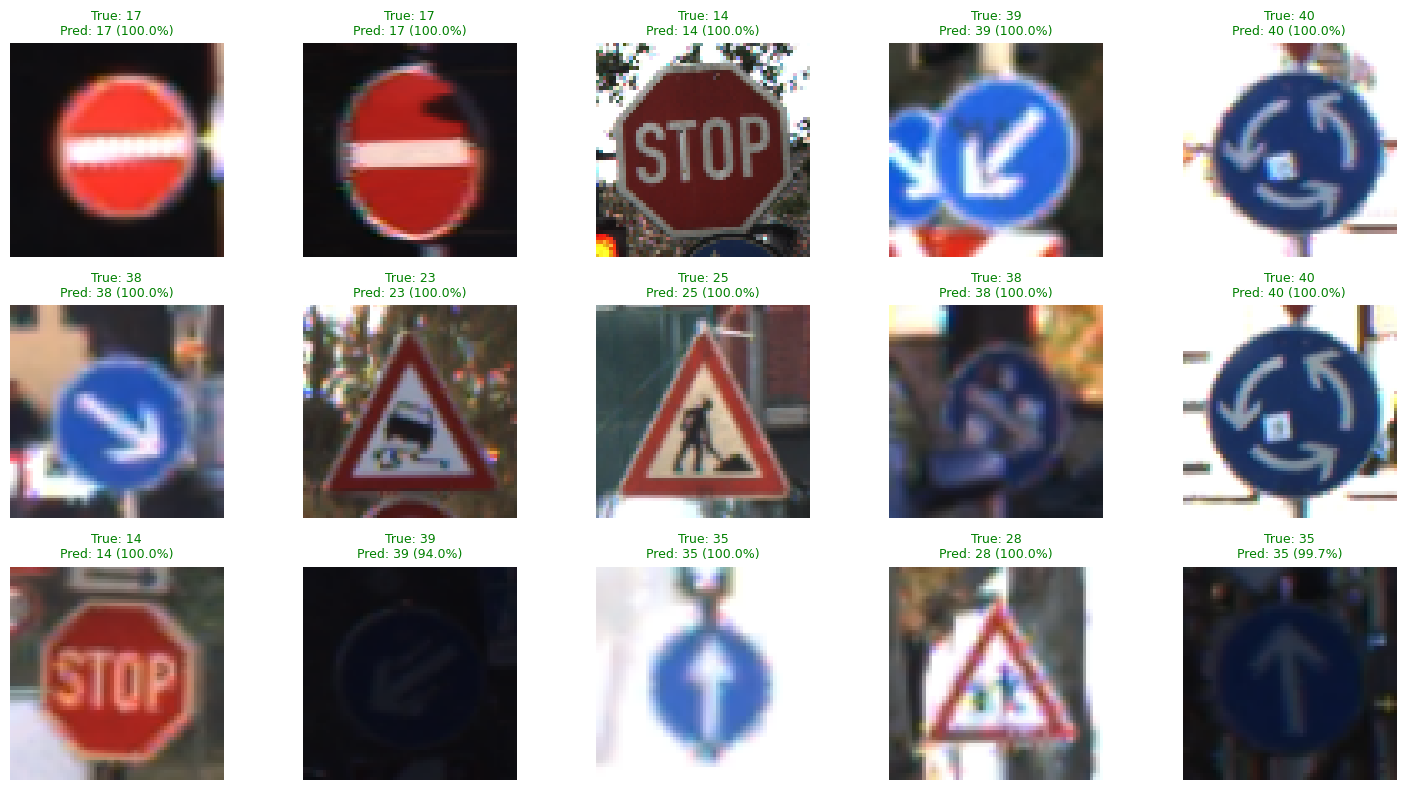


3. Saving the Model...
✅ Success! Model saved as 'traffic_sign_model.h5' in your Colab files.


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

print("1. Generating Confusion Matrix...")

test_ds_unshuffled = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)


class_names = test_ds_unshuffled.class_names


test_ds_unshuffled = test_ds_unshuffled.map(lambda x, y: (normalization_layer(x), y))


y_pred_probabilities = model.predict(test_ds_unshuffled)
y_pred = np.argmax(y_pred_probabilities, axis=1)


y_true = np.concatenate([y for x, y in test_ds_unshuffled], axis=0)


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix: Where Does Our Model Make Mistakes?', fontsize=14)
plt.tight_layout()
plt.show()

print("\n2. Generating Sample Predictions...")
plt.figure(figsize=(15, 8))
for images, labels in test_ds.take(1):
    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)


    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])

        true_label = class_names[labels[i]]
        pred_label = class_names[batch_pred_labels[i]]
        confidence = np.max(batch_predictions[i]) * 100


        color = 'green' if true_label == pred_label else 'red'

        plt.title(f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)",
                  fontsize=9, color=color)
        plt.axis('off')

plt.tight_layout()
plt.show()

print("\n3. Saving the Model...")
model.save('traffic_sign_model.h5')
print("✅ Success! Model saved as 'traffic_sign_model.h5' in your Colab files.")